In [1]:
# Program Summary

# This code will predict the future trajectory of M33 as it orbits M31.
# Code Required to run:
#      1.) COM orbit files for M31 and M33 computed from HW6
#      2.) Store G = 4.498768e-6 without units [kpc3/M_sun/Gyr]


In [1]:
# Import Modules
import numpy as np





In [5]:
class M33AnaylticalOrbit:
    
    
################
# Part 1 Start #
################

    # Initialize class funciton
    def __init__(self, stored_filename):
        
        #Store filename
        self.filename = stored_filename

    # Initalize quantities M33 relative to M31:
        # Init Positions 
        self.x, self.y, self.z = -98.56, -119.99, -127.76
        
        # Init. Velocity
        self.vx, self.vy, self.vz = -28.43, 173.92, 93.23
        
        #Init. disk scale length, 
        #      disk mass (M31) 
        #      bulge Length (M31)
        #      bulge Mass (M31)
        #      halo length (M31) hernquist scale length
        #      halo mass (M31)
        #                                      UNITS:
        self.rdisk = 5                         # [kpc]
        self.Mdisk = 1.2e11                    # [0.12*10**12 M_sun]
        self.rbulge = 1                        # [kpc]
        self.Mbulge = 1.9e10                   # [0.019*10**12 M_sun]
        self.rhalo =  69                       # [kpc]
        self.Mhalo = 1.921e12                  # [1.921*10**12 M_sun]
        
        self.G = G = 4.498768e-6               #Grav. const. [kpc3/M_sun/Gyr]
##############
# Part 1 End #
##############

################
# Part 2 Start #
################

# 2.1
    def HernquistAccel(self, M, r_a, x, y, z, D):
        # This function compute the gravitational acceleration components for M31
        # This function takes in inputs: Mass (Halo or bulge mass)
        #                                r_a (scale length)
        #                                components (x,y,z)
        #                                Dummy variable D, direction
        
        r = np.sqrt(x**2+y**2+z**2)
        
        if D == 'x':
            accel = -(self.G * M) * x / (r*(r_a + r)**2) 
        elif D == 'y':
            accel = -(self.G * M) * y/ (r*(r_a + r)**2) 
        else:
            accel = -(self.G * M) * z/ (r*(r_a + r)**2) 
            
        
        return accel
# 2.2
    def MiyamotoNagaiAccel(self, M, rd, x, y, z, Dcomp):
        # This function compute the gravitational acceleration components for M31
        # This function takes in inputs: Mass (Halo or bulge mass)
        #                                r_d (disk scale length)
        #                                components (x,y,z)
        #                                Dummy variable D, direction   
        
        # Define z_height of disk
        z_d = self.rdisk/5

        # Define constant B
        B = self.rdisk + np.sqrt(z**2 + z_d**2)

        # Define constant R
        R =  np.sqrt(x**2 + y**2)
        
        # Set xy numerator and denomator
        xy_numerator = (self.G * M)
        xy_denominator = ((R**2 + B**2)**1.5) #* np.sqrt(z**2+z_d)
        
        # If dummy = z find respective acceleration
        if Dcomp == 'z':
            # Set numerator varialbes
            az_numerator = self.G* M * B * z
            
            # Set denominator variables
            az_denominator = ((R**2 + B**2)**1.5) * np.sqrt(z**2 + z_d**2)
            
            # Define acceleration for z comp.
            accel = -az_numerator/az_denominator
            
        # else x and y comp. is defined as the following
        elif Dcomp == 'y' :
            # Define Acceleration for x and y component
            accel = -xy_numerator * y/xy_denominator 
        
        else:
            # Define Acceleration for x and y component
            accel = -xy_numerator* x/xy_denominator 
        
        return accel
# Part 2.3
    def M31Accel(self, x, y, z, D):
        # This function sums all acceleration terms from each galaxy component
        # This function takes in inputs: x [x component]
        #                                y [y component]
        #                                z [z component]
        #                                D [dummy variable]
        
        # Determine Bulge acceleration
        Accel_Bulge = self.HernquistAccel(self.Mbulge, self.rbulge, x, y, z, D)
        
        # Determine Halo acceleration
        Accel_Halo = self.HernquistAccel(self.Mhalo, self.rhalo, x , y , z, D)
        
        # Determine Disk acceleration
        Accel_Disk = self.MiyamotoNagaiAccel(self.Mdisk, self.rdisk, x, y, z, D)
        
        # Compute total acceleration
        Accel_total = Accel_Bulge + Accel_Disk + Accel_Halo
        
        return Accel_total
        
            
##############
# Part 2 End #
##############

################
# Part 3 Start #
################

    def LeapFrog(self, d_t, x0, y0, z0, vx0, vy0, vz0):
        # This function
        # This function takes in inputs: delta t (d_t change in time)
        #                                starting positions x0, y0, z0 (x,y,z-not)
        #                                starting velocities vx0, vy0, vz0 (vx,vy,vz-not)
        
        # Update position coordinates at half time step
        x_n_plus_half = x0 + (vx0*d_t*0.5)
        y_n_plus_half = y0 + (vy0*d_t*0.5)
        z_n_plus_half = z0 + (vz0*d_t*0.5)
        
        # calculate acceleration at half steps
        a_n_plus_half_x = self.M31Accel(x_n_plus_half, \
                                      y_n_plus_half, \
                                      z_n_plus_half, 'x')
       
        a_n_plus_half_y = self.M31Accel(x_n_plus_half, \
                                      y_n_plus_half, \
                                      z_n_plus_half, 'y')
        
        a_n_plus_half_z = self.M31Accel(x_n_plus_half, \
                                      y_n_plus_half, \
                                      z_n_plus_half, 'z')
        
        # Calculate velocity full step for each component
        v_n_plus_1_x = vx0 + (a_n_plus_half_x*d_t)
        v_n_plus_1_y = vy0 + (a_n_plus_half_y*d_t)
        v_n_plus_1_z = vz0 + (a_n_plus_half_z*d_t)
        
        # Calculate full step of position for each component
        x_full_step = x0 +(0.5*(vx0 + v_n_plus_1_x)*d_t)
        y_full_step = y0 +(0.5*(vy0 + v_n_plus_1_y)*d_t)
        z_full_step = z0 +(0.5*(vz0 + v_n_plus_1_z)*d_t)
        
        
        return x_full_step, y_full_step, z_full_step, v_n_plus_1_x, v_n_plus_1_y, v_n_plus_1_z
    
##############
# Part 3 End #
##############

################
# Part 4 Start #
################

    def OrbitIntegrator(self, t0, d_t, t_max):
        
        # Starting positions to be updated as integrating
        x, y, z, vx, vy, vz = self.x, self.y, self.z, self.vx, self.vy, self.vz
        t = t0
        Rows = int(t_max/d_t)
        Orbit= np.zeros((Rows+2, 7))
        
        # Store Starting Positions
        Orbit[0, 0] = t
        Orbit[0, 1] = x
        Orbit[0, 2] = y
        Orbit[0, 3] = z
        Orbit[0, 4] = vx
        Orbit[0, 5] = vy
        Orbit[0, 6] = vz
       
        ith_row = 1
        while (t <= t_max):
            
            
            t += d_t
            
            # Define rows to store updated 
            #ith_row = int(t/d_t)
           # print (ith_row)
            #print(ith_row)
            x, y, z, vx, vy, vz = self.LeapFrog(d_t, x, y, z, vx, vy, vz)
            # Store updated values
            Orbit[ith_row, 0] = t
            Orbit[ith_row, 1] = x
            Orbit[ith_row, 2] = y
            Orbit[ith_row, 3] = z
            Orbit[ith_row, 4] = vx
            Orbit[ith_row, 5] = vy
            Orbit[ith_row, 6] = vz
            
            print ("%.2f, %.2f, %.2f, %.2f, %.2f, %.2f, %.2f" % (t,x,y,z,vx,vy,vz))
            
            # Compute integrator
            #x, y,  z, vx, vy, vz = self.LeapFrog(d_t, x, y, z, vx, vy, vz)
            
         

            #print ("%s, %2.f, %2.f, %2.f, %2.f, %2.f, %2.f" % (t,x,y,z,vx,vy,vz))
            ith_row += 1
            
    
        np.savetxt(self.filename,  Orbit, header = 't x y z vx vy vz', comments = '#', \
                  fmt = ['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])
        

In [6]:
Orbit =  M33AnaylticalOrbit("M33Orbit_Integrator.txt")
Calc_Orbit = Orbit.OrbitIntegrator(0 ,0.1, 10)

0.10, -101.04, -102.19, -117.99, -21.15, 182.03, 102.23
0.20, -102.70, -83.57, -107.26, -12.00, 190.37, 112.39
0.30, -103.31, -64.12, -95.44, -0.36, 198.71, 123.90
0.40, -102.60, -43.85, -82.40, 14.61, 206.56, 136.91
0.50, -100.17, -22.88, -67.98, 34.02, 212.95, 151.42
0.60, -95.51, -1.43, -52.06, 59.08, 216.06, 166.95
0.70, -88.04, 20.02, -34.62, 90.47, 212.88, 182.01
0.80, -77.18, 40.64, -15.85, 126.65, 199.60, 193.39
0.90, -62.75, 59.34, 3.67, 161.90, 174.41, 196.86
1.00, -45.24, 75.14, 23.01, 188.32, 141.51, 189.95
1.10, -25.69, 87.63, 41.33, 202.78, 108.33, 176.54
1.20, -5.17, 97.02, 58.20, 207.60, 79.50, 160.79
1.30, 15.53, 103.80, 73.50, 206.39, 56.12, 145.31
1.40, 35.95, 108.49, 87.33, 201.90, 37.57, 131.16
1.50, 55.83, 111.51, 99.81, 195.76, 22.87, 118.59
1.60, 75.06, 113.21, 111.12, 188.92, 11.12, 107.50
1.70, 93.60, 113.85, 121.38, 181.85, 1.61, 97.72
1.80, 111.44, 113.62, 130.72, 174.83, -6.18, 89.06
1.90, 128.58, 112.68, 139.24, 167.99, -12.63, 81.33
2.00, 145.05, 111.15, 

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
M33_integrate = np.genfromtxt("M33Orbit_Integrator.txt", comments = '#')
M33_data = np.loadtxt("OrbitM33.txt", comments = '#')
M31_data = np.loadtxt("OrbitM31.txt", comments = '#')
print (M33_integrate)

[[  0.00000000e+00  -9.85600000e+01  -1.19990000e+02  -1.27760000e+02
   -2.84300000e+01   1.73920000e+02   9.32300000e+01]
 [  1.00000000e-01  -1.01040000e+02  -1.02190000e+02  -1.17990000e+02
   -2.11500000e+01   1.82030000e+02   1.02230000e+02]
 [  2.00000000e-01  -1.02700000e+02  -8.35700000e+01  -1.07260000e+02
   -1.20000000e+01   1.90370000e+02   1.12390000e+02]
 [  3.00000000e-01  -1.03310000e+02  -6.41200000e+01  -9.54400000e+01
   -3.60000000e-01   1.98710000e+02   1.23900000e+02]
 [  4.00000000e-01  -1.02600000e+02  -4.38500000e+01  -8.24000000e+01
    1.46100000e+01   2.06560000e+02   1.36910000e+02]
 [  5.00000000e-01  -1.00170000e+02  -2.28800000e+01  -6.79800000e+01
    3.40200000e+01   2.12950000e+02   1.51420000e+02]
 [  6.00000000e-01  -9.55100000e+01  -1.43000000e+00  -5.20600000e+01
    5.90800000e+01   2.16060000e+02   1.66950000e+02]
 [  7.00000000e-01  -8.80400000e+01   2.00200000e+01  -3.46200000e+01
    9.04700000e+01   2.12880000e+02   1.82010000e+02]
 [  8.00

In [12]:
# M33 integrated data
M_I_Time = M33_integrate[:,0]
M_I_r = np.sqrt(M33_integrate[:,1]**2 + M33_integrate[:,2]**2 + M33_integrate[:,3]**2)
M_I_v = np.sqrt(M33_integrate[:,4]**2 + M33_integrate[:,5]**2 + M33_integrate[:,6]**2)


# M31 / M33 data from previous homework
M31x = M31_data[:,1]
M31y = M31_data[:,2]
M31z = M31_data[:,3]
M31vx = M31_data[:,4]
M31vy = M31_data[:,5]
M31vz = M31_data[:,6]

M33x = M33_data[:,1]
M33y = M33_data[:,2]
M33z = M33_data[:,3]
M33vx = M33_data[:,4]
M33vy = M33_data[:,5]
M33vz = M33_data[:,6]

R_M33_31 = abs(np.sqrt((M33x - M31x)**2 + (M33y - M31y)**2 + (M33z - M31z)**2))
VR_M33_31 = abs(np.sqrt((M33vx - M31vx)**2 + (M33vy - M31vy)**2 + (M33vz - M31vz)**2))
#print (M_I_Time)

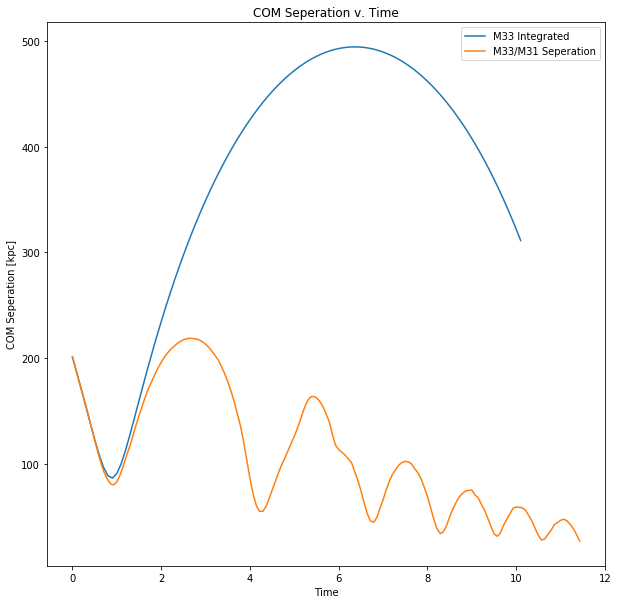

In [13]:
plt.figure(figsize = (10,10))
plt.title("COM Seperation v. Time")
plt.xlabel("Time")
plt.ylabel("COM Seperation [kpc]")
plt.plot(M_I_Time, np.abs(M_I_r), label = "M33 Integrated")
plt.plot(M31_data[:,0], R_M33_31, label = "M33/M31 Seperation")
plt.legend()

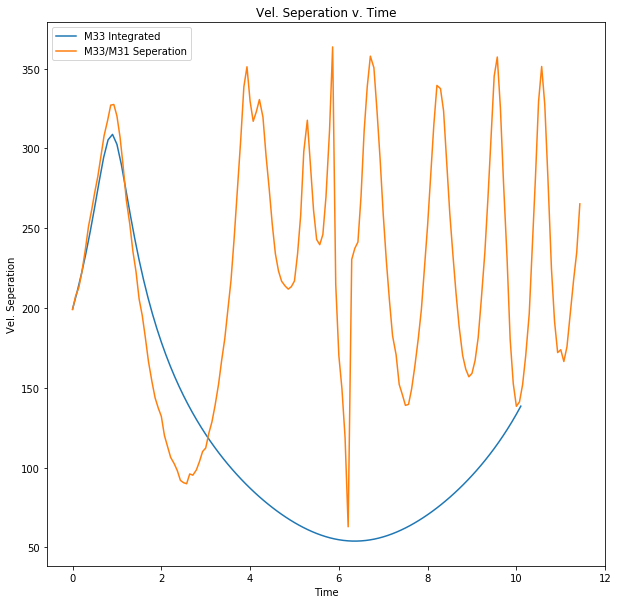

In [16]:
plt.figure(figsize=(10,10))
plt.title("Vel. Seperation v. Time")
plt.xlabel("Time")
plt.ylabel("Vel. Seperation")
plt.plot(M_I_Time, np.abs(M_I_v), label = "M33 Integrated")
plt.plot(M31_data[:,0], VR_M33_31, label = "M33/M31 Seperation")
plt.legend()

### Analysis
1. Above you find two plots, one for position and velocity as a function of time. Using the integrated values computed from the code and using HW 6 previous results.
2. HW 6 data, M33/M31 COM seperation has a oscilating decaying orbit, while the integrate M33 orbit shows a more steady cycle.
3. Well M33 is being treated as a point mass, friction between the two galaxies.
4. Since the seperation of M33 to MW is large, the MW will contribute small changes to M33 quantities until the merger event occurs around 6 Gyrs. At that point, you could continue integrating over the merger of both MW and M33. So you need to account for both galaxies positions and velocity vectors at times after the merger and integrate over, with the adjust mass of each component and readjust the scaled lengths.